<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.542891,29.934507,49.654470,-75.179191,46.952677,70.414737,-23.462060
1,0.0,1.0,82.224857,48.559157,80.896407,101.620525,323.300946,287.198035,36.102911
2,0.0,2.0,67.725358,78.271160,34.909391,-1126.148825,-935.242916,136.091008,-1071.333924
3,0.0,3.0,79.038642,78.064057,26.033883,33.032681,226.169263,0.687153,225.482110
4,0.0,4.0,95.720550,70.696693,83.282181,-416.222880,-156.523455,415.439634,-571.963089
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.304594,24.405283,86.056684,249.576091,425.342652,286.639977,138.702676
249996,999.0,246.0,56.821240,48.490018,92.790658,-284.774265,-76.672349,275.931510,-352.603859
249997,999.0,247.0,25.950022,68.440496,31.296980,-386.621504,-250.934006,285.749445,-536.683450
249998,999.0,248.0,28.915398,87.775819,41.020470,2677.757426,2845.469113,277.747842,2567.721271


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    32.542891  29.934507  49.654470   -75.179191    46.952677   
      1.0    82.224857  48.559157  80.896407   101.620525   323.300946   
      2.0    67.725358  78.271160  34.909391 -1126.148825  -935.242916   
      3.0    79.038642  78.064057  26.033883    33.032681   226.169263   
      4.0    95.720550  70.696693  83.282181  -416.222880  -156.523455   
...                ...        ...        ...          ...          ...   
999.0 245.0  55.304594  24.405283  86.056684   249.576091   425.342652   
      246.0  56.821240  48.490018  92.790658  -284.774265   -76.672349   
      247.0  25.950022  68.440496  31.296980  -386.621504  -250.934006   
      248.0  28.915398  87.775819  41.020470  2677.757426  2845.469113   
      249.0  41.376869  44.669172  52.860230   590.725028   739.631299   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     70.414737   -23.462060  
      1.0    287.198035    36.102911  
      2.0    136.091008 -1071.333924  
      3.0      0.687153   225.482110  
      4.0    415.439634  -571.963089  
...                 ...          ...  
999.0 245.0  286.639977   138.702676  
      246.0  275.931510  -352.603859  
      247.0  285.749445  -536.683450  
      248.0  277.747842  2567.721271  
      249.0  269.304656   470.326644  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    32.542891  29.934507  49.654470   -75.179191    46.952677   
      1.0    82.224857  48.559157  80.896407   101.620525   323.300946   
      2.0    67.725358  78.271160  34.909391 -1126.148825  -935.242916   
      3.0    79.038642  78.064057  26.033883    33.032681   226.169263   
      4.0    95.720550  70.696693  83.282181  -416.222880  -156.523455   
...                ...        ...        ...          ...          ...   
999.0 245.0  55.304594  24.405283  86.056684   249.576091   425.342652   
      246.0  56.821240  48.490018  92.790658  -284.774265   -76.672349   
      247.0  25.950022  68.440496  31.296980  -386.621504  -250.934006   
      248.0  28.915398  87.775819  41.020470  2677.757426  2845.469113   
      249.0  41.376869  44.669172  52.860230   590.725028   739.631299   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     70.414737   -23.462060  
      1.0    287.198035    36.102911  
      2.0    136.091008 -1071.333924  
      3.0      0.687153   225.482110  
      4.0    415.439634  -571.963089  
...                 ...          ...  
999.0 245.0  286.639977   138.702676  
      246.0  275.931510  -352.603859  
      247.0  285.749445  -536.683450  
      248.0  277.747842  2567.721271  
      249.0  269.304656   470.326644  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.542891,29.934507,49.654470,-75.179191,46.952677,70.414737,-23.462060
1,0.0,1.0,82.224857,48.559157,80.896407,101.620525,323.300946,287.198035,36.102911
2,0.0,2.0,67.725358,78.271160,34.909391,-1126.148825,-935.242916,136.091008,-1071.333924
3,0.0,3.0,79.038642,78.064057,26.033883,33.032681,226.169263,0.687153,225.482110
4,0.0,4.0,95.720550,70.696693,83.282181,-416.222880,-156.523455,415.439634,-571.963089
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.304594,24.405283,86.056684,249.576091,425.342652,286.639977,138.702676
249996,999.0,246.0,56.821240,48.490018,92.790658,-284.774265,-76.672349,275.931510,-352.603859
249997,999.0,247.0,25.950022,68.440496,31.296980,-386.621504,-250.934006,285.749445,-536.683450
249998,999.0,248.0,28.915398,87.775819,41.020470,2677.757426,2845.469113,277.747842,2567.721271


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    32.542891  29.934507  49.654470   -75.179191    46.952677   
      1.0    82.224857  48.559157  80.896407   101.620525   323.300946   
      2.0    67.725358  78.271160  34.909391 -1126.148825  -935.242916   
      3.0    79.038642  78.064057  26.033883    33.032681   226.169263   
      4.0    95.720550  70.696693  83.282181  -416.222880  -156.523455   
...                ...        ...        ...          ...          ...   
999.0 245.0  55.304594  24.405283  86.056684   249.576091   425.342652   
      246.0  56.821240  48.490018  92.790658  -284.774265   -76.672349   
      247.0  25.950022  68.440496  31.296980  -386.621504  -250.934006   
      248.0  28.915398  87.775819  41.020470  2677.757426  2845.469113   
      249.0  41.376869  44.669172  52.860230   590.725028   739.631299   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     70.414737   -23.462060  
      1.0    287.198035    36.102911  
      2.0    136.091008 -1071.333924  
      3.0      0.687153   225.482110  
      4.0    415.439634  -571.963089  
...                 ...          ...  
999.0 245.0  286.639977   138.702676  
      246.0  275.931510  -352.603859  
      247.0  285.749445  -536.683450  
      248.0  277.747842  2567.721271  
      249.0  269.304656   470.326644  

[250000 rows x 7 columns]

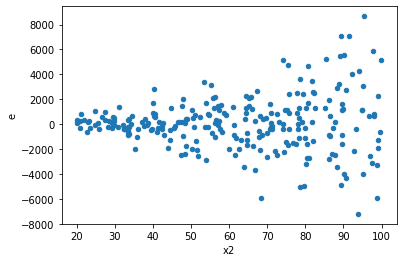

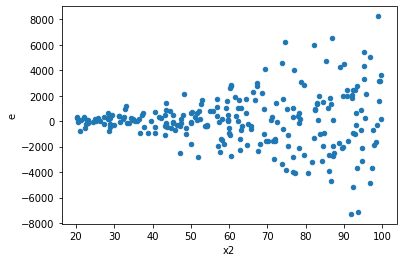

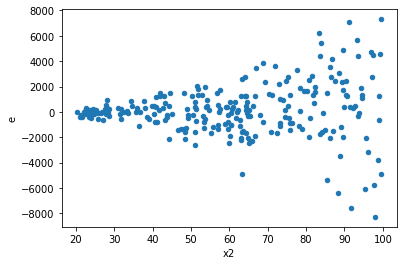

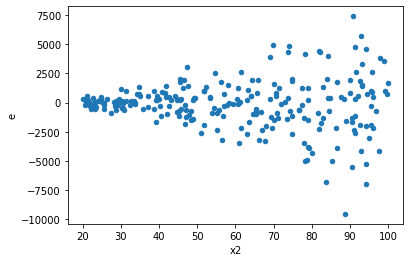

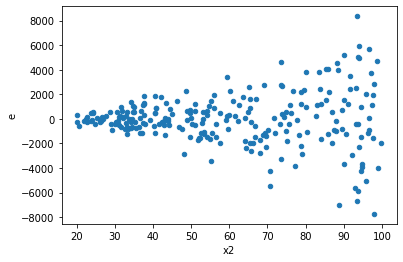

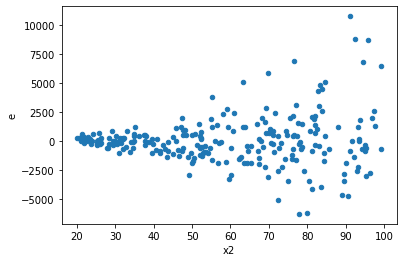

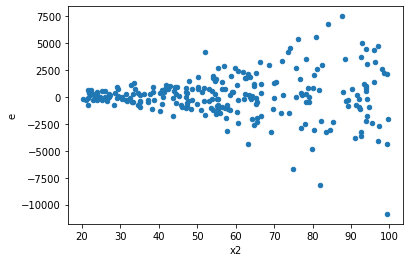

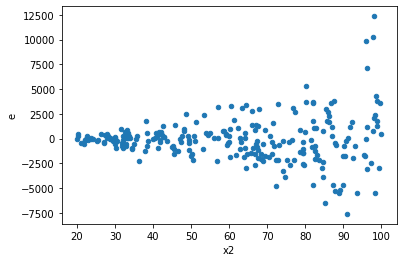

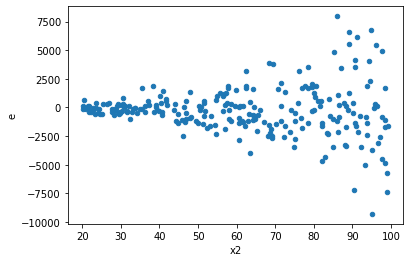

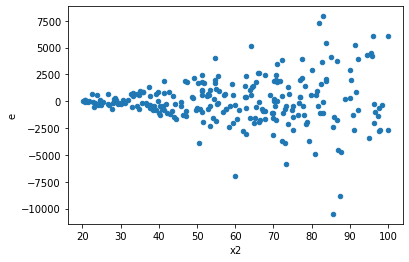

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,128.0,116.0,280027963.47686726,786130641.4526544,2187718.4646630255,6776988.288384952,3.097742418802875,1.8000199109025061e-09,0.99999999909999,9.000099554512531e-10,Reject005=0 : Heteroscedasticity
5.0,118.0,126.0,93206734.10750192,1012750975.051648,789887.5771822197,8037706.151203556,10.175759669340048,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,135.0,109.0,568835370.2067052,750608572.0808707,4213595.334864483,6886317.17505386,1.6343090942014573,0.00806418015052257,0.9959679099247387,0.004032090075261285,Reject005=0 : Heteroscedasticity
8.0,99.0,145.0,208223180.63609004,887327772.0160267,2103264.4508695966,6119501.875972598,2.909525653534668,4.874480374894574e-09,0.9999999975627598,2.437240187447287e-09,Reject005=0 : Heteroscedasticity
11.0,125.0,119.0,398698896.4339348,557518731.4046862,3189591.1714714784,4685031.356341901,1.4688501141607186,0.03510546780971069,0.9824472660951447,0.017552733904855344,Reject005=0 : Heteroscedasticity
14.0,118.0,126.0,515174578.05192506,786419453.7994078,4365886.254677331,6241424.236503237,1.4295892912502186,0.04892530887254809,0.975537345563726,0.024462654436274045,Reject005=0 : Heteroscedasticity
15.0,150.0,94.0,671356835.6906401,706611783.56025,4475712.2379376,7517146.633619681,1.6795419888485879,0.006942943684720149,0.9965285281576399,0.0034714718423600743,Reject005=0 : Heteroscedasticity
16.0,127.0,117.0,179007761.17680475,1159193322.2584488,1409509.9305260216,9907635.232978195,7.029134749891913,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,118.0,126.0,356789016.92730445,629049661.0462424,3023635.7366720717,4992457.627351129,1.6511438751699694,0.0058248065739707755,0.9970875967130146,0.0029124032869853878,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,139.0,105.0,778843834.8768612,358395125.34023786,5603193.056668066,3413286.9080022653,0.6091681784799993,0.006312544030825315,Reject005=0 : Heteroscedasticity
1.0,118.0,126.0,615844824.9812338,424219148.5167309,5219023.940518931,3366818.6390216737,0.6451050382970478,0.01651312564274311,Reject005=0 : Heteroscedasticity
2.0,140.0,104.0,980556699.8761121,82221670.3307405,7003976.427686515,790592.9839494278,0.11287773340073458,1.887306769054544e-30,Reject005=0 : Heteroscedasticity
3.0,128.0,116.0,280027963.47686726,786130641.4526544,2187718.4646630255,6776988.288384952,3.097742418802875,1.8000199109025061e-09,Reject005=0 : Heteroscedasticity
4.0,119.0,125.0,755160514.9770905,345085285.8307415,6345886.680479752,2760682.286645932,0.4350349172067509,6.604058746382345e-06,Reject005=0 : Heteroscedasticity
5.0,118.0,126.0,93206734.10750192,1012750975.051648,789887.5771822197,8037706.151203556,10.175759669340048,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,125.0,119.0,631828073.4679227,438051041.79098153,5054624.587743381,3681101.1915208534,0.7282640139975791,0.08060400611203233,Reject005=1 : Homoscedasticity
7.0,135.0,109.0,568835370.2067052,750608572.0808707,4213595.334864483,6886317.17505386,1.6343090942014573,0.00806418015052257,Reject005=0 : Heteroscedasticity
8.0,99.0,145.0,208223180.63609004,887327772.0160267,2103264.4508695966,6119501.875972598,2.909525653534668,4.874480374894574e-09,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    781
Reject005=1 : Homoscedasticity      219
Name: Result_test, dtype: int64